In [3]:
import pandas as pd

# Load Dataset 1 (Physiological and Fitness Metrics)
dataset1 = pd.read_csv('/workspaces/datamining/Project HYPERFIT/Datasets/gym_members_exercise_tracking.csv')

# Load Dataset 2 (Exercise Descriptions)
dataset2 = pd.read_csv('/workspaces/datamining/Project HYPERFIT/Datasets/megaGymDataset.csv')

# Display first few rows to verify
print("Dataset 1:")
print(dataset1.head())
print("\nDataset 2:")
print(dataset2.head())

Dataset 1:
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0   

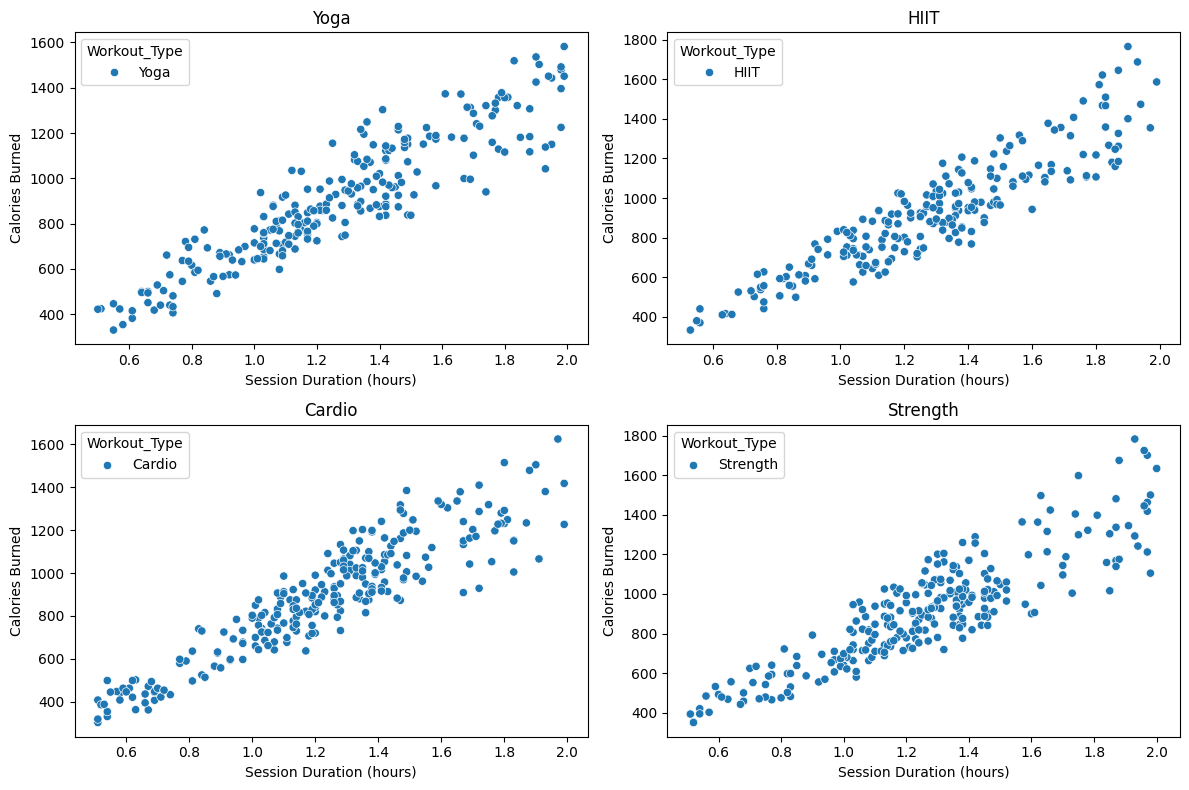

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dataset1 is already loaded
# Filter by Workout_Type and create scatter plots
workout_types = dataset1['Workout_Type'].unique()

plt.figure(figsize=(12, 8))
for i, workout_type in enumerate(workout_types, 1):
    plt.subplot(2, 2, i)
    subset = dataset1[dataset1['Workout_Type'] == workout_type]
    sns.scatterplot(data=subset, x='Session_Duration (hours)', y='Calories_Burned', hue='Workout_Type')
    plt.title(f'{workout_type}')
    plt.xlabel('Session Duration (hours)')
    plt.ylabel('Calories Burned')
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Prepare the data
X = dataset1[['Workout_Type', 'Session_Duration (hours)']]
y = dataset1['Calories_Burned']

# Encode Workout_Type
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Changed 'sparse' to 'sparse_output'
X_encoded = encoder.fit_transform(X[['Workout_Type']])
X_final = np.hstack((X_encoded, X[['Session_Duration (hours)']].values))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Function to predict calories burned
def predict_calories(workout_type, duration):
    workout_encoded = encoder.transform([[workout_type]])
    input_data = np.hstack((workout_encoded, [[duration]]))
    prediction = model.predict(input_data)[0]
    return prediction

# Example usage
workout = 'Strength'
duration = 1.5
calories = predict_calories(workout, duration)
print(f"Expected calories burned for {workout} workout lasting {duration} hours: {calories:.2f}")

Expected calories burned for Strength workout lasting 1.5 hours: 1080.55


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
